## Moving in 2D

In [1]:
abstract type AbstractWalker end

In [2]:
abstract type AbstractWalker2D <: AbstractWalker end

In [3]:
struct Location
        x::Int64
        y::Int64
end

In [4]:
mutable struct Walker2D <: AbstractWalker2D
    position::Location
end

In [5]:
origin=Location(0, 0)

Location(0, 0)

In [6]:
OriginWalker=Walker2D(origin)

Walker2D(Location(0, 0))

In [7]:
mutable struct walker2D <: AbstractWalker2D
    position::Location
    walker2D(x, y)=new(Location(x,y))
end

In [8]:
function make_tuple(location:: Location)
    x=location.x
    y=location.y
    return(x,y)
end

make_tuple (generic function with 1 method)

In [9]:
function pos(Aw2::AbstractWalker2D)
    p=Aw2.position
    return(p)
end

pos (generic function with 1 method)

In [10]:
function set_pos!(Aw2::AbstractWalker2D, l)
    Aw2.position=l
end

set_pos! (generic function with 1 method)

In [11]:
w=walker2D(2, 4)

walker2D(Location(2, 4))

In [12]:
set_pos!(w, Location(40, 40))

Location(40, 40)

In [13]:
w.position

Location(40, 40)

In [14]:
function jump(Aw2::AbstractWalker2D)
    
    pos1=pos(Aw2)
    postuple=make_tuple(pos1)
    oldx=postuple[1]
    oldy=postuple[2]
    newx=oldx + rand(-1:1)
    newy=oldy + rand(-1:1)
    
    return (newx, newy)
    
end

jump (generic function with 1 method)

In [15]:
function jump!(Aw2::AbstractWalker2D)
    
    newpos=jump(Aw2)
    x=newpos[1]
    y=newpos[2]
    Aw2.position=Location(x, y)
    
    return Aw2.position
    
end

jump! (generic function with 1 method)

In [16]:
function trajectory(Aw2::AbstractWalker2D, N)
    t=[make_tuple(jump!(Aw2)) for i in 1:N]
    return(t)
end
    

trajectory (generic function with 1 method)

In [17]:
trajectory(w, 10)

10-element Array{Tuple{Int64,Int64},1}:
 (40, 40)
 (39, 39)
 (39, 39)
 (38, 39)
 (39, 39)
 (39, 39)
 (39, 39)
 (38, 39)
 (39, 39)
 (38, 39)

In [18]:
ts=[]

for i in 1:10
    w=walker2D(0,0)
    push!(ts, trajectory(w, 10000))
end

In [19]:
ts

10-element Array{Any,1}:
 [(1, 0), (2, -1), (3, 0), (4, -1), (4, 0), (3, 1), (3, 1), (3, 2), (4, 2), (5, 2)  …  (-40, -109), (-40, -110), (-41, -111), (-41, -110), (-41, -109), (-42, -109), (-43, -108), (-43, -107), (-42, -106), (-42, -105)]
 [(1, 1), (1, 1), (2, 2), (3, 3), (4, 3), (3, 4), (4, 4), (3, 3), (2, 2), (2, 1)  …  (-38, -52), (-38, -53), (-39, -54), (-39, -55), (-38, -56), (-39, -57), (-38, -57), (-37, -56), (-38, -55), (-38, -54)]
 [(-1, 1), (-1, 2), (-2, 3), (-1, 3), (-2, 2), (-3, 2), (-2, 1), (-1, 0), (-1, -1), (-1, -1)  …  (119, 64), (120, 65), (120, 64), (121, 63), (121, 62), (120, 61), (119, 62), (119, 61), (118, 62), (118, 62)]
 [(-1, 0), (-1, 0), (-2, -1), (-1, -2), (-2, -1), (-2, -1), (-2, -1), (-1, -1), (-1, -2), (-1, -3)  …  (-179, -13), (-179, -14), (-179, -15), (-178, -16), (-179, -15), (-178, -15), (-179, -14), (-180, -13), (-180, -14), (-179, -15)]
 [(1, 1), (1, 2), (2, 2), (2, 1), (2, 2), (1, 2), (0, 1), (-1, 2), (0, 3), (0, 4)  …  (-34, 3), (-35, 4), (-34, 5

In [20]:
using Plots

In [21]:
p=plot();

In [22]:
for t in ts
    plot!(t, leg=false)
end

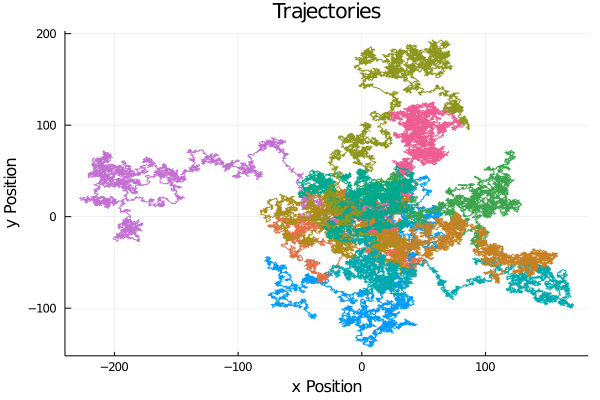

In [23]:
p
xlabel!("x Position")
ylabel!("y Position")
title!("Trajectories")

## Making agents move

In [24]:
@enum InfectionStatus S I R

In [25]:
mutable struct Agent <: AbstractWalker2D
    position::Location
    state::InfectionStatus
    num_infected::Int64
    Agent(x, y)=new(Location(x, y), S, 0)
end
    

In [26]:
function jump(Aw2::Agent, L=20)
    
    L=L/2
    pos1=pos(Aw2)
    postuple=make_tuple(pos1)
    oldx=postuple[1]
    oldy=postuple[2]
    newx=oldx + rand(-1:1)
    newy=oldy + rand(-1:1)
    
    if(newx>L || newx<-L || newy>L || newy<-L)
        newx=oldx
        newy=oldy
    end
    
    return (newx, newy)
    
end

jump (generic function with 3 methods)

In [27]:
a=Agent(0,0)

Agent(Location(0, 0), S, 0)

In [28]:
function jump!(Aw2::AbstractWalker2D, L)
    
    newpos=jump(Aw2, L)
    x=newpos[1]
    y=newpos[2]
    Aw2.position=Location(x, y)
    
    return  Aw2.position
    
end

jump! (generic function with 2 methods)

In [29]:
function trajectory(Aw2::Agent, N)
    t=[make_tuple(jump!(Aw2, 20)) for i in 1:N]
    return(t)
end

trajectory (generic function with 2 methods)

In [30]:
ts=[]
push!(ts, trajectory(a, 1000))


1-element Array{Any,1}:
 [(0, -1), (1, 0), (1, -1), (2, -2), (3, -1), (2, -1), (1, -1), (0, 0), (1, 0), (2, 1)  …  (7, 7), (7, 6), (7, 7), (8, 8), (8, 8), (8, 8), (7, 9), (6, 10), (5, 9), (5, 8)]

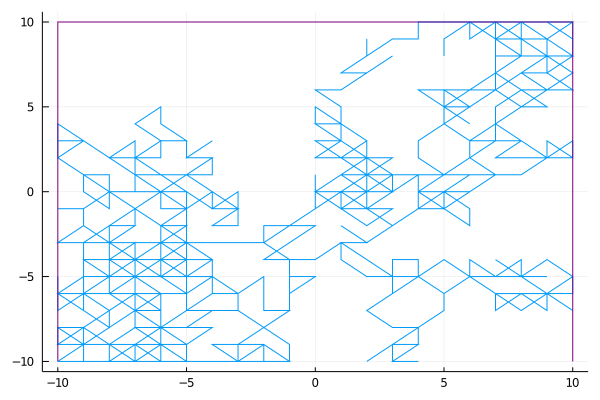

In [31]:
box=[(-10, -10), (-10, 10), (10, 10), (10, -10)]

p=plot()
for t in ts
    plot!(t, leg=false)
end

plot!(box, color="purple")

## Spatial Epidemic Model/Init

In [32]:
function randinitpos(L)
    L= (L/2)-1
    x=rand(-L:L)
    y=rand(-L:L)
    
    return(x, y)
    
end

randinitpos (generic function with 1 method)

In [33]:
function initialize(L, N)
    
    Positions=[] 
    Agents=[]
    for i in 1:N
        
        valid=0
        
        while valid !== 1
            pos=randinitpos(L)
            if pos in Positions
                continue
            else
                valid=1
                push!(Positions, pos)
                ag=Agent(pos[1], pos[2])
                push!(Agents, ag)
            end
        end
        
    end
    
    Agents[1].state=I
    return Agents, Positions
        
end

initialize (generic function with 1 method)

In [34]:
Agents=initialize(10, 20)[1]

20-element Array{Any,1}:
 Agent(Location(3, 1), I, 0)
 Agent(Location(2, 4), S, 0)
 Agent(Location(0, -2), S, 0)
 Agent(Location(2, 3), S, 0)
 Agent(Location(3, -4), S, 0)
 Agent(Location(-3, -2), S, 0)
 Agent(Location(1, -2), S, 0)
 Agent(Location(2, -1), S, 0)
 Agent(Location(3, -2), S, 0)
 Agent(Location(-2, 0), S, 0)
 Agent(Location(0, -4), S, 0)
 Agent(Location(-1, -3), S, 0)
 Agent(Location(1, -4), S, 0)
 Agent(Location(-2, 1), S, 0)
 Agent(Location(-4, 4), S, 0)
 Agent(Location(-1, 4), S, 0)
 Agent(Location(-4, -3), S, 0)
 Agent(Location(-4, 2), S, 0)
 Agent(Location(-1, -2), S, 0)
 Agent(Location(-4, 1), S, 0)

In [35]:

function visualize_agents(Agents)
    
    
    Sus=[]
    In=[]
    Re=[]
    
    for Agent in Agents
        
        pos=make_tuple(Agent.position)
        state=Agent.state
        
        if state==S
            push!(Sus, pos)
        
        elseif state==I
            push!(In, pos)
        
        elseif state==R
            push!(Re, pos)
        
        end
        
        
    end
    
    
    Sus=[element for element in Sus]
    In=[element for element in In]
    Re=[element for element in Re]
    
    
    
    scatter()
    scatter!(Sus, label="susceptible", ratio=1)
    scatter!(In, label="infected", ratio=1)
    scatter!(Re, label="recovered", ratio=1)
   
end
        
        

visualize_agents (generic function with 1 method)

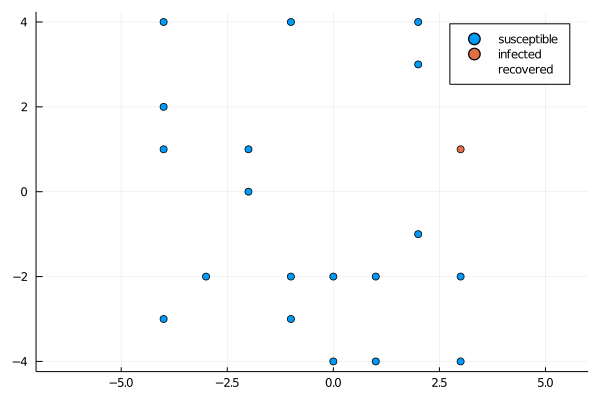

In [36]:
visualize_agents(Agents)

## Spatial Epidemic Model/Dynamics

In [37]:
function Organize_agents(Agents)
    
    
    Sus=[]
    In=[]
    Re=[]
    
    
    for Agent in Agents
        
        pos=make_tuple(Agent.position)
        state=Agent.state
        
        if state==S
            push!(Sus, pos)
        end
        
        if state==I
            push!(In, pos)
            
        end
        
        if state==R
            push!(Re, pos)
        
        end
        
        
    end
    
    Sus=[element for element in Sus]
    In=[element for element in In]
    Re=[element for element in Re]
    
    return Sus, In, Re
   
end

Organize_agents (generic function with 1 method)

In [38]:
function step!(L, P_I, P_R, N, Agents, Positions)
    
    randn=rand(1:N)
    agenti=Agents[randn]
    statei=agenti.state
    pos=make_tuple(agenti.position)
    newpos=jump(agenti, L)
    

    if newpos !== pos
        
        if newpos in Positions
            
            n=1
            
            for element in Positions
                if(newpos==Positions[n])
                    break
            
                else
                    n=n+1
                end
                
            end
            
            agentj=Agents[n]
            statej=agentj.state
            
            
            if statei==I && statej==S

                r=rand()
                
                if(P_I>r)
                    agentj.state=I
                end
                
            end
                
            if statei==I
                
                rr=rand()
                if(P_R > rr)
                    agenti.state=R
                end
                
            end
            
            
            
            
        else 
            
            
            if statei==I
                
                rr=rand()
                if(P_R > rr)
                    agenti.state=R
                end
            end
    
        
            agenti.position=Location(newpos[1], newpos[2])
            Positions[randn]=(newpos[1], newpos[2])   
                
            
        end
        
    end
        

end
        
    

step! (generic function with 1 method)

In [39]:


function sweep!(L, P_I, P_R, N, T, saveagents, savepos)
    
    Sus2=[]
    In2=[]
    Re2=[]
    
    if (saveagents==nothing && savepos==nothing)
        
        ini=initialize(L, N)
        Agents=ini[1]
        Positions=ini[2]
        
    else 
        Agents=saveagents
        Positions=savepos
    end
    
    
    for i in 1:T
        step!(L, P_I, P_R, N, Agents, Positions)
        o=Organize_agents(Agents)
       
        push!(Sus2, o[1])
        push!(In2, o[2])
        push!(Re2, o[3])
        
    end
    
    Sus2=[element for element in Sus2]
    In2=[element for element in In2]
    Re2=[element for element in Re2]
    
    return Sus2, In2, Re2, Agents, Positions
    
end

sweep! (generic function with 1 method)

In [40]:
a=sweep!(10, 0.9, 0.3, 20, 2, nothing, nothing)

([[(4, -1), (4, 2), (-4, 4), (-3, 1), (2, -3), (-3, -3), (3, -1), (1, -1), (-4, -1), (2, 1), (2, 4), (1, -4), (3, 4), (1, 4), (-3, 3), (-3, -2), (1, 2), (1, 0), (0, -1)], [(4, -1), (4, 2), (-4, 4), (-3, 1), (2, -3), (-3, -3), (3, -1), (1, -1), (-4, -1), (2, 1), (2, 4), (1, -4), (3, 4), (1, 4), (-2, 4), (-3, -2), (1, 2), (1, 0), (0, -1)]], [[(3, 0)], [(3, 0)]], Array{Any,1}[[], []], Any[Agent(Location(3, 0), I, 0), Agent(Location(4, -1), S, 0), Agent(Location(4, 2), S, 0), Agent(Location(-4, 4), S, 0), Agent(Location(-3, 1), S, 0), Agent(Location(2, -3), S, 0), Agent(Location(-3, -3), S, 0), Agent(Location(3, -1), S, 0), Agent(Location(1, -1), S, 0), Agent(Location(-4, -1), S, 0), Agent(Location(2, 1), S, 0), Agent(Location(2, 4), S, 0), Agent(Location(1, -4), S, 0), Agent(Location(3, 4), S, 0), Agent(Location(1, 4), S, 0), Agent(Location(-2, 4), S, 0), Agent(Location(-3, -2), S, 0), Agent(Location(1, 2), S, 0), Agent(Location(1, 0), S, 0), Agent(Location(0, -1), S, 0)], Any[(3.0, 0.0),

In [41]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4668954517222210803\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13531231552799230839\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4668954517222210803\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [42]:
function visualization_sim(Simulation)
    
    Sus=Simulation[1]
    In=Simulation[2]
    Re=Simulation[3]
    
    
    
    l=length(Sus)

    @manipulate for i in slider(1:l, value=1)
        
        scatter(ratio=1);
        scatter!(Sus[i], label="susceptible")
        scatter!(In[i], label="infected")
        scatter!(Re[i], label="recovered")
        xlims!(-6, 6)
        ylims!(-6, 6)
        xlabel!("x Position")
        ylabel!("y Position")
        title!("Simulation")
        
    end
    
end

visualization_sim (generic function with 1 method)

In [43]:
sim=sweep!(10, 0.9, 0.1, 40, 1000, nothing, nothing);

In [44]:
visualization_sim(sim)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000002ab97c70, Task (runnable) @0x000000002ab97c70), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25

In [45]:
function dynamics!(L, P_I, P_R, N, Tstp, Tswp)
     
    saveagents=nothing
    savepos=nothing 
    
    sv=Int64[]
    iv=Int64[]
    rv=Int64[]
    AllAg=[]
    
    for nofswp in 1:Tswp
        
        sweep=sweep!(L, P_I, P_R, N, Tstp, saveagents, savepos)
        Agentsswp=sweep[4]
        Positions=sweep[5]
        
        saveagents=deepcopy(Agentsswp)
        savepos=deepcopy(Positions)
        
        s=0
        i=0
        r=0
        
        for Agent in Agentsswp

            state=Agent.state

            if state==S
                s=s+1
            end

            if state==I
                i=i+1
            end

            if state==R
                r=r+1
            end
        
        end
        
        push!(sv, s)
        push!(iv, i)
        push!(rv, r)
        push!(AllAg, Agentsswp)
        
    end
    
    return sv, iv, rv, AllAg
    
end

dynamics! (generic function with 1 method)

In [125]:
run=dynamics!(10, 0.1, 0.001, 10, 100, 500);

In [126]:
Ag=run[4];
sv=run[1];
iv=run[2];
rv=run[3];

In [127]:
function vpoints(s, i, r)
    plot!(s)
    plot!(i)
    plot!(r)
end

vpoints (generic function with 1 method)

In [128]:
l=length(Ag)

@manipulate for i in slider(1:l, value=1)
    Agents=Ag[i]
    
    p1=scatter()
    visualize_agents(Agents)
    p1=xlims!(-6, 6)
    p1=ylims!(-6, 6)
    p1=xlabel!("x Position")
    p1=ylabel!("y Position")
    p1=title!("Simulation after Sweep")
    
    p2=plot()
    p2=plot!(sv[1:i], label="susceptible")
    p2=plot!(iv[1:i], label="infected")
    p2=plot!(rv[1:i], label="recovered")
    p2=xlabel!("Sweep")
    p2=ylabel!("Number")
    
    hbox(p1, p2)
    
end 

    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 500,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000125b1430, Task (runnable) @0x00000000125b1430), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\

In [108]:
simulations=[sim=dynamics!(10, 0.1, 0.001, 30, 100, 1000) for sim in 1:50]

50-element Array{Tuple{Array{Int64,1},Array{Int64,1},Array{Int64,1},Array{Any,1}},1}:
 ([29, 28, 28, 27, 27, 27, 27, 27, 27, 27  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2, 2, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  29, 29, 29, 29, 29, 29, 29, 29, 29, 29], [Any[Agent(Location(3, 3), I, 0), Agent(Location(3, 0), S, 0), Agent(Location(4, -4), S, 0), Agent(Location(-5, 0), S, 0), Agent(Location(-2, 2), S, 0), Agent(Location(-1, 3), S, 0), Agent(Location(2, 0), S, 0), Agent(Location(-1, -4), S, 0), Agent(Location(1, 0), S, 0), Agent(Location(2, -3), S, 0)  …  Agent(Location(3, -2), S, 0), Agent(Location(-2, 4), S, 0), Agent(Location(2, 4), S, 0), Agent(Location(2, -1), S, 0), Agent(Location(5, 1), S, 0), Agent(Location(-1, -2), S, 0), Agent(Location(-2, 1), S, 0), Agent(Location(-4, 3), S, 0), Agent(Location(-5, -4), S, 0), Agent(Location(1, -4), S, 0)], Any[Agent(Location(4, 3), I, 0), Agent(Location(3, 2), S, 0), Agent(Location(5, -5), S, 0),

In [109]:

allsv=[simulations[i][1] for i in 1:50]

50-element Array{Array{Int64,1},1}:
 [29, 28, 28, 27, 27, 27, 27, 27, 27, 27  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 29, 29, 29, 29, 29  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 28, 28, 28, 28, 28, 28, 28, 28, 28  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 28, 28, 28, 28, 28, 28, 27, 27, 27  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 28, 28, 28, 28, 28, 28, 28, 28, 28  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 28, 28, 28, 28, 28  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 29, 29, 29, 29, 29  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 29, 29, 29, 29, 29  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 28, 28, 28, 28, 28  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [28, 26, 26, 26, 26, 26, 26, 26, 26, 26  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 29, 29, 29, 29, 29, 28, 28, 28, 27  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [29, 28, 28, 28, 28, 27, 27, 27, 27, 27  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [28, 28, 28, 28, 28, 28, 28, 28, 28, 28  …  0, 0, 0, 0, 0, 0, 0

In [110]:
alliv=[simulations[i][2] for i in 1:50]

50-element Array{Array{Int64,1},1}:
 [1, 2, 2, 3, 3, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
 [1, 2, 2, 2, 2, 2, 2, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [1, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
 [2, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
 [1, 1, 1, 1, 1, 1, 2, 2, 2, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [1, 2, 2, 2, 2, 3, 3, 3, 3, 3  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  7, 7, 7, 7, 6, 6, 6, 6, 6, 6]
 ⋮
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2

In [111]:
allrv=[simulations[i][3] for i in 1:50]

50-element Array{Array{Int64,1},1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  23, 23, 23, 23, 23, 23, 23, 23, 23, 23]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  28, 28, 28, 28, 28, 28, 28, 28, 28, 28]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  23, 23, 23, 23, 24, 24, 24, 2

In [112]:
using StatsBase

In [113]:
meansv=mean(allsv);

In [114]:
meaniv=mean(alliv);

In [115]:
meanrv=mean(allrv);

In [116]:
function calculatest(vector, mean)
    
    c=1
    vs=Array[]
    
    for element in vector
        
        v=Float64[]
        
        for data in element
            
            m=mean[c]
            distance=(m-data)^2
            push!(v, distance)
            c=c+1
            
        end
        
        push!(vs, v)
        c=1
        
    end
    
    return vs

end 
    
    
            
            
            
        
    

calculatest (generic function with 1 method)

In [117]:
σsv=calculatest(allsv, meansv);
stdsv=mean(σsv).^(1/2);

In [118]:
σiv=calculatest(alliv, meaniv);
stdiv=mean(σiv).^(1/2);

In [119]:
σrv=calculatest(allrv, meanrv);
stdrv=mean(σrv).^(1/2);

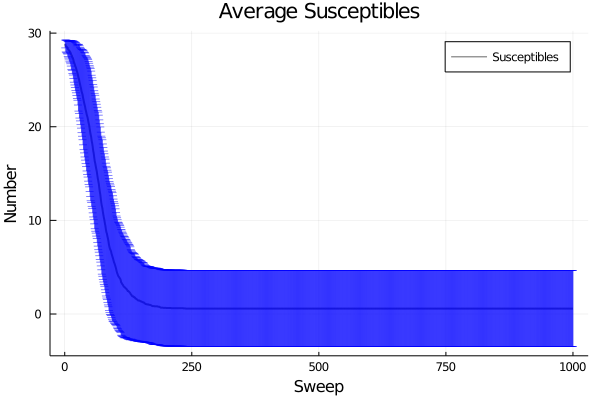

In [129]:

plot(meansv, linewidth = 2, yerr=stdsv, alpha=0.6, labels="Susceptibles", markerstrokecolor="blue", color="black")
title!("Average Susceptibles")
xlabel!("Sweep")
ylabel!("Number")

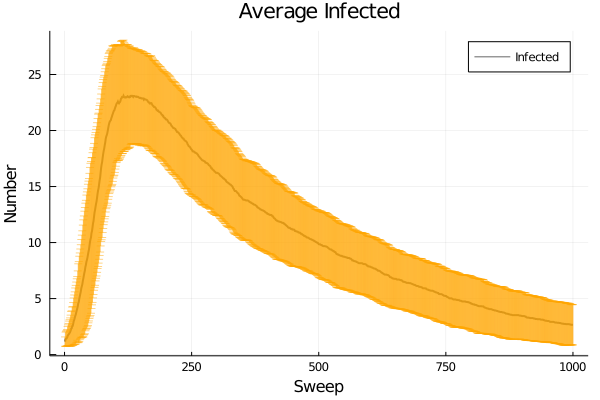

In [124]:
plot(meaniv, linewidth = 2, yerr=stdiv, alpha=0.6, labels="Infected", markerstrokecolor="orange", color="black")
title!("Average Infected")
xlabel!("Sweep")
ylabel!("Number")

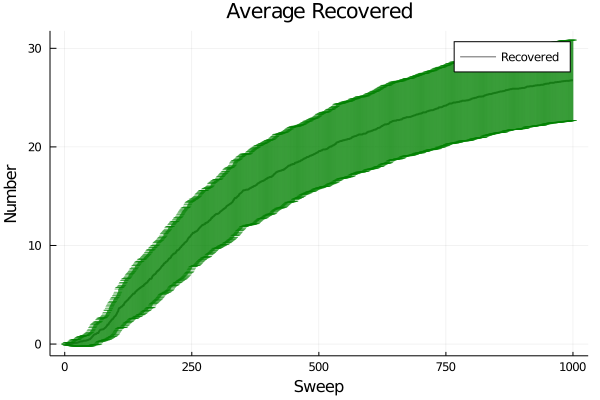

In [122]:
plot(meanrv, linewidth = 2, yerr=stdrv, alpha=0.6, labels="Recovered", markerstrokecolor="green", color="black")
title!("Average Recovered")
xlabel!("Sweep")
ylabel!("Number")

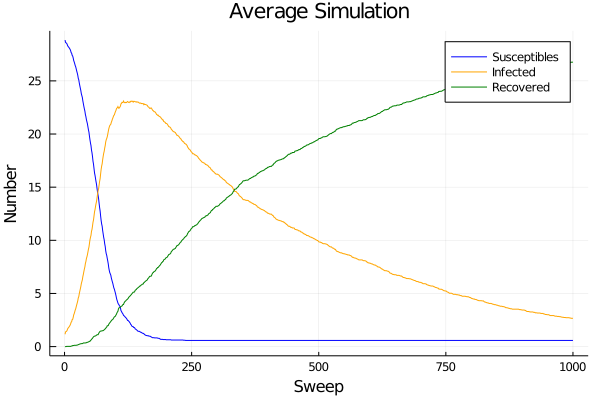

In [123]:
plot()
plot!(meansv, color="blue", label="Susceptibles")
plot!(meaniv, color="orange", label="Infected")
plot!(meanrv, color="green", label="Recovered")
title!("Average Simulation")
xlabel!("Sweep")
ylabel!("Number")